In [1]:
# 01 Import libraries

In [2]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import folium
import json

In [115]:
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

In [4]:
%matplotlib inline

In [5]:
# 02 Import data 

In [6]:
path = r'/Users/woodoooo/Desktop/World University Rankings'

In [7]:
file = os.path.join(path, '02_Data', 'Prepared Data', 'QS_Rankings_selected_col_cleaned.xlsx')

In [8]:
df = pd.read_excel(file)

In [12]:
df.columns

Index(['Rank_num', 'Rank_sym', 'Previous Rank_num', 'Previous Rank_sym', 'Name', 'Country/Territory', 'Region', 'Size', 'Focus', 'Research', 'Status', 'AR SCORE', 'ER SCORE', 'FSR SCORE',
       'CPF SCORE', 'IFR SCORE', 'ISR SCORE', 'ISD SCORE', 'IRN SCORE', 'EO SCORE', 'SUS SCORE', 'AR RANK_num', 'AR RANK_sym', 'ER RANK_num', 'ER RANK_sym', 'FSR RANK_num', 'FSR RANK_sym',
       'CPF RANK_num', 'CPF RANK_sym', 'IFR RANK_num', 'IFR RANK_sym', 'ISR RANK_num', 'ISR RANK_sym', 'ISD RANK_num', 'ISD RANK_sym', 'IRN RANK_num', 'IRN RANK_sym', 'EO RANK_num', 'EO RANK_sym',
       'SUS RANK_num', 'SUS RANK_sym', 'Overall SCORE'],
      dtype='object')

In [9]:
# 03 search

In [28]:
top100fsr = df.sort_values(
    by= 'FSR SCORE',
    ascending=False).head(100)

In [35]:
fsr_to_ar = top100fsr[["Name", "FSR SCORE", "AR SCORE"]]

In [37]:
fsr_to_ar.head()

,Name,FSR SCORE,AR SCORE
23,Johns Hopkins University,100.0,93.2
0,Massachusetts Institute of Technology (MIT),100.0,100.0
577,Universität Jena,100.0,23.4
517,Pontificia Universidad Católica Argentina Sant...,100.0,30.2
20,Yale University,100.0,100.0


In [38]:
fsr_to_ar.describe()

,FSR SCORE,AR SCORE
count,100.000000,100.000000
mean,97.334000,41.287000
std,2.819923,34.815432
min,91.200000,3.300000
25%,94.800000,11.075000
50%,98.250000,27.650000
75%,99.900000,75.350000
max,100.000000,100.000000


In [39]:
top100sus = df.sort_values(
    by= 'SUS SCORE',
    ascending=False).head(100)

In [40]:
sus_to_ar = top100sus[["Name", "SUS SCORE", "AR SCORE"]]

In [41]:
sus_to_ar.describe()

,SUS SCORE,AR SCORE
count,100.000000,100.000000
mean,91.796000,71.603000
std,3.816072,22.358184
min,86.000000,23.800000
25%,88.400000,52.275000
50%,91.700000,71.950000
75%,94.475000,95.825000
max,100.000000,100.000000


In [42]:
sus_to_ar_full = df[["Name", "SUS SCORE", "AR SCORE"]]

In [43]:
sus_to_ar_full.describe()

,SUS SCORE,AR SCORE
count,1479.000000,1503.000000
mean,51.229750,25.764937
std,21.262767,24.491393
min,3.000000,1.000000
25%,35.700000,8.800000
50%,48.700000,16.000000
75%,66.450000,32.600000
max,100.000000,100.000000


In [48]:
fsr_to_ar_full = df[["Name", "Country/Territory", "FSR SCORE", "AR SCORE"]]

In [49]:
fsr_to_ar_full.describe()

,FSR SCORE,AR SCORE
count,1503.000000,1503.000000
mean,33.979907,25.764937
std,28.451886,24.491393
min,1.000000,1.000000
25%,10.800000,8.800000
50%,23.600000,16.000000
75%,50.550000,32.600000
max,100.000000,100.000000


In [70]:
df_200_500 = df[(df["Rank_num"] >= 200) & (df["Rank_num"] <= 500)].sort_values(
    by= 'SUS SCORE',
    ascending=False)

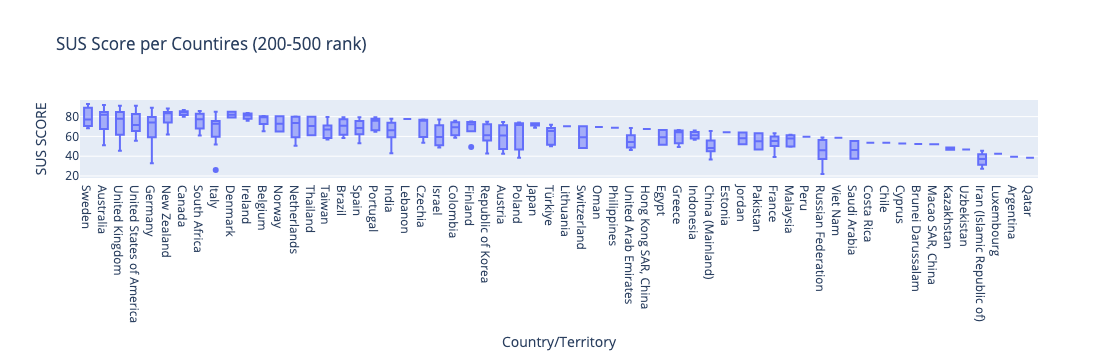

In [72]:
# boxplot для FSR Score по странам
fig_fsr = px.box(df_200_500,
    x="Country/Territory",
    y="SUS SCORE",
    title="SUS Score per Countires (200-500 rank)",
)
fig_fsr.show()

In [75]:
df_200_500_fsr = df[(df["Rank_num"] >= 200) & (df["Rank_num"] <= 500)].sort_values(
    by= 'FSR SCORE',
    ascending=False)

In [77]:
df_200_500_fsr.head(20)

,Rank_num,Rank_sym,Previous Rank_num,Previous Rank_sym,Name,Country/Territory,Region,Size,Focus,Research,Status,AR SCORE,ER SCORE,FSR SCORE,CPF SCORE,IFR SCORE,ISR SCORE,ISD SCORE,IRN SCORE,EO SCORE,SUS SCORE,AR RANK_num,AR RANK_sym,ER RANK_num,ER RANK_sym,FSR RANK_num,FSR RANK_sym,CPF RANK_num,CPF RANK_sym,IFR RANK_num,IFR RANK_sym,ISR RANK_num,ISR RANK_sym,ISD RANK_num,ISD RANK_sym,IRN RANK_num,IRN RANK_sym,EO RANK_num,EO RANK_sym,SUS RANK_num,SUS RANK_sym,Overall SCORE
249,250.0,NaN,248.0,NaN,Vanderbilt University,United States of America,Americas,L,FC,VH,Private not for Profit,32.3,41.8,100.0,50.6,48.4,50.9,55.5,77.9,57.5,61.8,382,NaN,323,NaN,10,NaN,372,NaN,446.0,NaN,404.0,NaN,370.0,NaN,383.0,NaN,288,NaN,460.0,=,50.4
243,244.0,NaN,183.0,NaN,Hamad Bin Khalifa University,Qatar,Asia,S,FO,VH,Public,14.3,6.8,100.0,100.0,100.0,100.0,99.9,75.7,6.8,38.5,701,+,701,+,20,NaN,6,NaN,10.0,NaN,6.0,NaN,29.0,NaN,424.0,NaN,801,+,801.0,+,50.9
361,362.0,NaN,NaN,NaN,University of Chinese Academy of Sciences (UCAS),China (Mainland),Asia,XL,FC,VH,Public,30.9,11.9,100.0,75.1,NaN,3.9,3.1,93.7,15.6,NaN,396,NaN,701,+,11,NaN,179,NaN,NaN,NaN,801.0,+,801.0,+,108.0,NaN,801,+,NaN,NaN,40.9
319,320.0,NaN,298.0,NaN,Bauman Moscow State Technical University,Russian Federation,Europe,L,CO,VH,Public,41.1,63.8,99.9,2.0,81.0,85.8,87.1,14.2,10.1,47.6,289,NaN,168,NaN,25,NaN,801,+,287.0,NaN,190.0,NaN,160.0,NaN,801.0,+,801,+,770.0,=,43.5
500,499.0,NaN,431.0,NaN,Tomsk State University,Russian Federation,Europe,M,CO,VH,Public,25.3,20.0,99.3,7.0,28.0,94.7,93.2,66.4,7.1,30.6,502,NaN,656,NaN,39,NaN,801,+,609.0,NaN,131.0,NaN,125.0,NaN,599.0,NaN,801,+,801.0,+,32.2
426,427.0,NaN,413.0,NaN,Graz University of Technology,Austria,Europe,M,FO,VH,Public,21.9,22.1,99.2,18.8,86.6,71.3,53.1,52.3,15.2,42.6,568,NaN,601,NaN,43,NaN,735,NaN,248.0,NaN,267.0,NaN,388.0,NaN,801.0,+,801,+,801.0,+,36.0
204,205.0,NaN,187.0,NaN,Ecole Normale Supérieure de Lyon,France,Europe,S,CO,VH,Public,41.7,25.7,98.8,89.2,61.5,23.9,26.7,73.1,17.9,50.2,286,NaN,528,NaN,46,NaN,106,NaN,380.0,NaN,677.0,NaN,662.0,NaN,485.0,NaN,760,NaN,699.0,=,55.1
235,236.0,NaN,236.0,NaN,University of Rochester,United States of America,Americas,M,FC,VH,Private not for Profit,27.1,32.4,98.2,56.6,80.5,96.2,96.5,63.7,51.2,72.3,463,NaN,443,NaN,51,NaN,314,NaN,294.0,NaN,109.0,NaN,94.0,NaN,641.0,NaN,333,NaN,286.0,=,51.9
280,281.0,NaN,275.0,NaN,University of Pittsburgh,United States of America,Americas,L,FC,VH,Public,45.4,26.4,98.1,41.7,9.9,23.0,29.1,90.4,59.7,60.2,258,NaN,516,NaN,57,NaN,453,NaN,801.0,+,688.0,NaN,625.0,NaN,171.0,NaN,272,NaN,501.0,NaN,47.3
449,450.0,NaN,401.0,NaN,Kazan Federal University,Russian Federation,Europe,L,FC,VH,Public,27.2,19.5,98.1,3.8,14.0,97.7,97.8,86.7,19.6,55.3,460,NaN,669,NaN,54,NaN,801,+,801.0,+,94.0,NaN,83.0,NaN,225.0,NaN,732,NaN,596.0,=,34.3


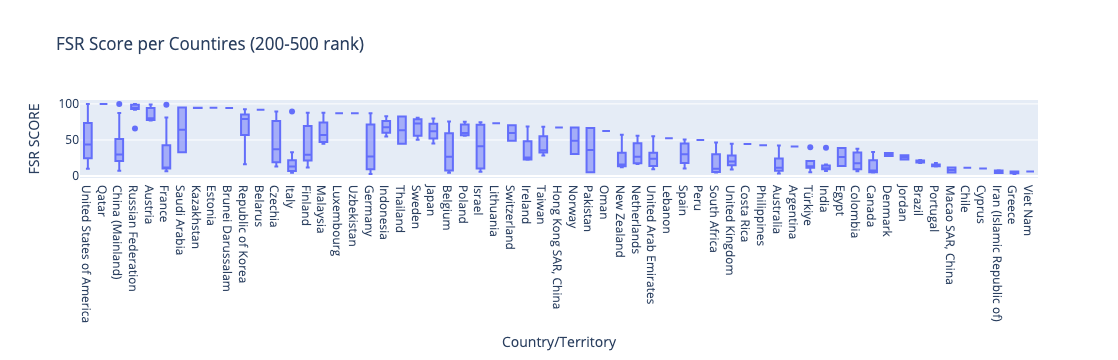

In [76]:
# boxplot для FSR Score по странам
fig_fsr = px.box(df_200_500_fsr,
    x="Country/Territory",
    y="FSR SCORE",
    title="FSR Score per Countires (200-500 rank)",
)
fig_fsr.show()

In [88]:
dffull_4scores = df.groupby("Region").agg({
    "Country/Territory": "nunique",   # or list, if you want all countries
    "SUS SCORE": ["mean", "median", "min", "max"],
    "FSR SCORE": ["mean", "median", "min", "max"],
    "EO SCORE":  ["mean", "median", "min", "max"],
    "ER SCORE":  ["mean", "median", "min", "max"],
    "Overall SCORE": ["mean", "median", "min", "max"]
})

In [89]:
dffull_4scores.head()

Country/Territory  SUS SCORE                      FSR SCORE                      EO SCORE                      ER SCORE                    Overall SCORE                    
                   nunique       mean median   min    max       mean median  min    max       mean median  min    max       mean median  min    max          mean median   min    max
Region                                                                                                                                                                               
Africa                  11  45.176596   42.2   9.5   92.1  16.972340   8.60  1.2   65.3  46.127660  33.20  2.8   99.5  17.127660  12.40  2.2   62.3     42.255556   41.6  29.5   62.3
Americas                19  51.914245   48.9   7.3  100.0  33.545531  22.45  2.3  100.0  36.321229  28.10  1.4  100.0  28.282682  17.35  1.6  100.0     50.913793   46.1  25.1  100.0
Asia                    39  44.211754   43.0   3.0   92.3  34.708481  24.85  1.0  100.0  22.834276  10.95  1.2  100.0  26.485866  15.80  1.4   99.9     42.637238   35.4  25.1   95.9
Europe                  35  56.971281   56.6  10.2   99.6  36.557377  28.20  1.8  100.0  31.055943  19.65  1.0  100.0  26.761270  17.40  1.0  100.0     47.099634   41.6  25.1   99.4
Oceania                  2  77.281818   83.5  23.5   98.2  17.722727  13.90  3.4   57.3  40.168182  26.20  1.7   98.7  33.715909  23.30  4.3   97.4     54.238462   52.1  27.1   90.8

<Figure size 800x600 with 0 Axes>

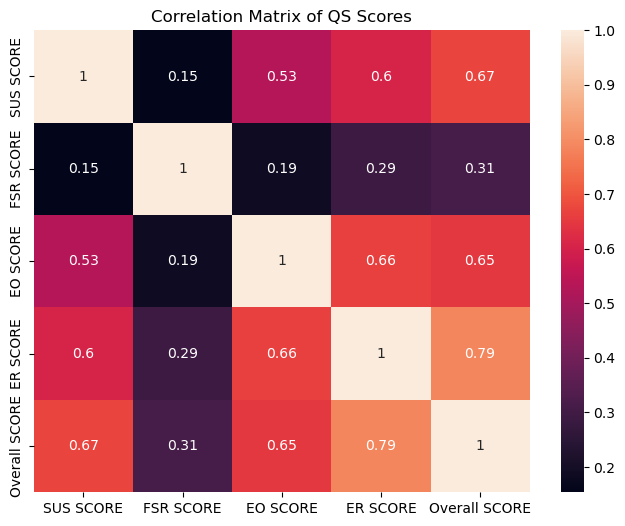

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric score columns
scores = ["SUS SCORE", "FSR SCORE", "EO SCORE", "ER SCORE", "Overall SCORE"]

# Compute correlation matrix
corr = df[scores].corr()

# Plot heatmap with values
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix of QS Scores")
plt.show()



Looking at this correlation matrix of QS scores, several interesting patterns emerge:

Employer-Focused Metrics Cluster: The strong correlations between Sustainability (SUS), Employment Outcomes (EO), Employer Reputation (ER), and Overall Score (0.53-0.79) reveal that universities excelling in one employer-related area tend to excel in others. This suggests a virtuous cycle where sustainable practices, employer reputation, and graduate outcomes reinforce each other.

Faculty-Student Ratio Isolation: FSR's weak correlations (0.15-0.31) indicate that having better faculty-student ratios doesn't necessarily translate to better employer outcomes or sustainability performance. This suggests class size/teaching intensity operates independently from industry connections and social impact.

Sustainability-Employment Link: The strong SUS-EO correlation (0.53) is particularly interesting, suggesting that universities with strong sustainability commitments also produce more employable graduates - possibly because employers increasingly value ESG-conscious institutions.


In [107]:
top50 = dffull_4scores_names = df.sort_values(
    by= ['SUS SCORE', 'ER SCORE', 'EO SCORE'],
    ascending=[False, False, False]).head(50)

In [110]:
# Show the universities with their region and country
top50_info = top50[["Name", "Region", "Country/Territory", "SUS SCORE", "ER SCORE", "EO SCORE"]]
print(top50_info)

                                                  Name    Region         Country/Territory  SUS SCORE  ER SCORE  EO SCORE
28                               University of Toronto  Americas                    Canada      100.0      99.1      99.4
6    ETH Zurich (Swiss Federal Institute of Technol...    Europe               Switzerland       99.6      96.3      95.0
17            University of California, Berkeley (UCB)  Americas  United States of America       98.8     100.0      99.8
71                                     Lund University    Europe                    Sweden       98.8      64.1      96.1
8                      UCL (University College London)    Europe            United Kingdom       98.5      99.4      89.3
39                      University of British Columbia  Americas                    Canada       98.5      96.5      84.9
1                              Imperial College London    Europe            United Kingdom       98.3     100.0      95.9
33                      

In [111]:
region_counts = top50["Region"].value_counts()
print(region_counts)

Region
Europe      28
Americas    12
Oceania      8
Asia         1
Africa       1
Name: count, dtype: int64


Europe has the most universities in the top 50 for sustainability, employability, and international outlook.

In [112]:
# Optional: count how many universities per country in top 50
country_counts = top50["Country/Territory"].value_counts()
print(country_counts)

Country/Territory
United Kingdom              17
United States of America     8
Australia                    7
Canada                       4
Sweden                       3
Belgium                      2
Switzerland                  1
Netherlands                  1
New Zealand                  1
Finland                      1
Germany                      1
France                       1
Japan                        1
South Africa                 1
Ireland                      1
Name: count, dtype: int64


In [113]:
region_scores = df.groupby("Region")[["SUS SCORE", "FSR SCORE", "EO SCORE", "ER SCORE", "Overall SCORE"]].mean()
region_scores.corr()

,SUS SCORE,FSR SCORE,EO SCORE,ER SCORE,Overall SCORE
SUS SCORE,1.000000,-0.370593,0.261974,0.771126,0.867822
FSR SCORE,-0.370593,1.000000,-0.823702,0.177585,-0.141521
EO SCORE,0.261974,-0.823702,1.000000,-0.308092,0.226248
ER SCORE,0.771126,0.177585,-0.308092,1.000000,0.833610
Overall SCORE,0.867822,-0.141521,0.226248,0.833610,1.000000


In [114]:
top50.groupby("Region")[["SUS SCORE", "ER SCORE", "EO SCORE"]].median()
top50.groupby("Country/Territory")[["SUS SCORE", "ER SCORE", "EO SCORE"]].median()

,SUS SCORE,ER SCORE,EO SCORE
Country/Territory,,,
Australia,92.50,87.50,86.70
Belgium,94.35,51.30,84.20
Canada,97.40,95.00,98.45
Finland,95.60,37.70,94.20
France,92.70,99.40,82.90
Germany,94.10,51.70,49.90
Ireland,91.70,57.60,92.20
Japan,92.30,99.90,100.00
Netherlands,96.30,90.40,66.00


In [170]:
np.random.seed(42)
n_universities = 500

df_random500_sub = pd.DataFrame({
    'Name': [f'Name{i}' for i in range(n_universities)],
    'Country/Territory': np.random.choice(
        ['USA', 'UK', 'Germany', 'Australia', 'Canada', 'China', 'Japan', 'France'],
        n_universities),
    'Region': np.random.choice(['Americas', 'Europe', 'Oceania', 'Asia', 'Africa'], n_universities),
    'Status': np.random.choice(['Public', 'Private not for Profit', 'Private for Profit'], n_universities),
    'Focus': np.random.choice(['FC', 'FO', 'SP', 'CO'], n_universities),
    'SUS_SCORE': np.random.normal(60, 15, n_universities),
    'EO_SCORE': np.random.normal(65, 20, n_universities),
    'ER_SCORE': np.random.normal(55, 18, n_universities),
    'FSR_SCORE': np.random.normal(70, 12, n_universities),
    'Overall_SCORE': np.random.normal(62, 16, n_universities),
    'Size': np.random.choice(['XL', 'L', 'M', 'S'], n_universities),
})

# Ensure scores are within 0-100
for col in ['SUS_SCORE', 'EO_SCORE', 'ER_SCORE', 'FSR_SCORE', 'Overall_SCORE']:
    df_random500_sub[col] = np.clip(df_random500_sub[col], 0, 100)

In [171]:
# ---------------------------
# Analysis function
# ---------------------------
def analyze_esg_employment_connection(df):
    """Investigate the relationship between sustainability (SUS_SCORE)
    and employment outcomes (EO_SCORE)."""

    df = df.copy()

    # Create sustainability quintiles from SUS_SCORE
    df['SUS_Quintile'] = pd.qcut(
        df['SUS_SCORE'],
        5,
        labels=['Bottom', 'Low', 'Middle', 'High', 'Top']
    )

    # Analysis 1: Employment outcomes by sustainability level
    print("1. Employment Outcomes by Sustainability Quintile:")
    eo_by_sus = df.groupby('SUS_Quintile')['EO_SCORE'].agg(['mean', 'std', 'count'])
    print(eo_by_sus)

    # Analysis 2: ESG–Employment correlation by Region
    print("\n2. ESG–Employment Correlation by Region:")
    regional_corr = df.groupby('Region').apply(lambda x: x['SUS_SCORE'].corr(x['EO_SCORE']))
    print(regional_corr)

    # Analysis 3: ESG–Employment correlation by Status
    print("\n3. ESG–Employment Correlation by Status:")
    status_corr = df.groupby('Status').apply(lambda x: x['SUS_SCORE'].corr(x['EO_SCORE']))
    print(status_corr)

    # Analysis 4: ESG–Employment correlation by Size
    print("\n4. ESG–Employment Correlation by Size:")
    size_corr = df.groupby('Size').apply(lambda x: x['SUS_SCORE'].corr(x['EO_SCORE']))
    print(size_corr)


# ---------------------------
# Run the analysis
# ---------------------------
analyze_esg_employment_connection(df_random500_sub)

1. Employment Outcomes by Sustainability Quintile:
                   mean        std  count
SUS_Quintile                             
Bottom        66.206118  20.079276    100
Low           65.951288  18.786840    100
Middle        63.857429  17.042883    100
High          68.181705  19.946129    100
Top           64.275753  20.061367    100

2. ESG–Employment Correlation by Region:
Region
Africa      0.016555
Americas   -0.100552
Asia       -0.003838
Europe     -0.023247
Oceania    -0.070719
dtype: float64

3. ESG–Employment Correlation by Status:
Status
Private for Profit       -0.035948
Private not for Profit   -0.080657
Public                    0.020638
dtype: float64

4. ESG–Employment Correlation by Size:
Size
L    -0.005084
M    -0.122360
S    -0.011167
XL    0.015058
dtype: float64


/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3186076526.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3186076526.py:24: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3186076526.py:29: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be exclu

1. Employment outcomes by sustainability quintile
Observation: The average EO_SCORE is fairly similar across quintiles (63–68).
Notable point: The “High” sustainability group has the highest mean EO (68.2), while the “Middle” group is slightly lower (63.9).
Implication: There isn’t a strong, consistent upward trend (i.e., more sustainability ≠ always better employment outcomes), but there’s some evidence that higher sustainability may coincide with slightly stronger employment outcomes.
Employment outcomes appear relatively stable across sustainability levels, with only modest differences. The “High” quintile performs best, but the “Top” quintile is not consistently higher than others.

2. ESG–Employment correlation by region
Observation: Correlations are all weak (close to 0).
Americas shows a slightly negative correlation (-0.10).
Africa is slightly positive (+0.02), but very weak.
Europe, Asia, Oceania: basically no relationship.
Implication: Regional context doesn’t show a strong ESG–employment connection. ESG may not be a key differentiator in employment outcomes regionally.
Across regions, the correlation between sustainability scores and employment outcomes is negligible. The Americas show a mild negative link, while other regions hover near zero.

3. ESG–Employment correlation by university status
Observation: Public universities have a tiny positive correlation (+0.02).
Private (both for-profit and not-for-profit) show slightly negative correlations (-0.04 to -0.08).
Implication: If there’s any difference, public institutions may align sustainability and employment slightly better, while private ones don’t show such alignment.
Public universities show a marginal positive association between sustainability and employment, while private institutions (both for-profit and not-for-profit) show a mild negative association.

4. ESG–Employment correlation by size
Observation: Correlations are again weak overall.
“M” size has the strongest (but still weak) negative correlation (-0.12).
“XL” shows a tiny positive correlation (+0.02).
“L” and “S” close to zero.
Implication: University size doesn’t strongly shape the ESG–employment relationship. If anything, medium-sized institutions show a slightly more negative link.
The ESG–employment connection does not vary strongly by size. Medium-sized universities display the most negative correlation, while very large universities lean slightly positive.

Overall interpretation (big picture)
Across quintiles, regions, statuses, and sizes, the ESG–employment link is weak to negligible.
The only mild patterns:
“High” quintile sustainability schools show better employment outcomes.
Public universities show a tiny positive link.
Americas show a mild negative link.
Implication for your presentation:
Sustainability efforts may not directly drive employment outcomes in this dataset.
Other factors (academic reputation, research, location, networks) are probably stronger employment drivers.
Still, certain niches (public institutions, “High” SUS group) suggest that ESG focus can align with employability.

In [180]:
import numpy as np
import pandas as pd

# ---------------------------
# FACULTY INVESTMENT PARADOX ANALYSIS
# ---------------------------
def analyze_faculty_paradox(df):
    """
    Investigate why FSR (Faculty-Student Ratio) doesn't correlate with employment outcomes (EO_SCORE).
    Returns a dict with results (eo_by_fsr table, R2 values, models if fitted).
    """
    # Local imports for ML tools (keeps function self-contained)
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    df = df.copy()
    results = {}

    # Basic checks
    if 'FSR_SCORE' not in df.columns or 'EO_SCORE' not in df.columns:
        raise ValueError("Dataframe must contain 'FSR_SCORE' and 'EO_SCORE'.")

    # Create FSR quintiles robustly (handle ties / insufficient uniques)
    try:
        df['FSR_Quintile'] = pd.qcut(df['FSR_SCORE'], 5,
                                     labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'],
                                     duplicates='raise')
    except ValueError:
        # fallback: allow qcut to drop duplicate bins, then fill missing by rank-based cut
        df['FSR_Quintile'] = pd.qcut(df['FSR_SCORE'], 5,
                                     labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'],
                                     duplicates='drop')
        if df['FSR_Quintile'].isnull().any():
            df['FSR_Quintile'] = pd.cut(df['FSR_SCORE'].rank(method='first'),
                                        bins=5,
                                        labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'])

    # Make ordered categorical (optional but nice)
    df['FSR_Quintile'] = pd.Categorical(df['FSR_Quintile'],
                                        categories=['Lowest', 'Low', 'Middle', 'High', 'Highest'],
                                        ordered=True)

    print("\n=== INVESTIGATING FACULTY INVESTMENT PARADOX ===\n")

    # Analysis 1: Employment outcomes by FSR level
    print("1. Employment Outcomes by Faculty-Student Ratio Quintile:")
    eo_by_fsr = df.groupby('FSR_Quintile')['EO_SCORE'].agg(['mean', 'std', 'count'])
    print(eo_by_fsr)
    results['eo_by_fsr'] = eo_by_fsr

    # Analysis 2: Non-linear relationship check (linear vs quadratic)
    print("\n2. Checking for Non-linear Relationships (Linear vs Quadratic R²):")
    X = df['FSR_SCORE'].values.reshape(-1, 1)
    y = df['EO_SCORE'].values

    # If there is not enough variance, skip model fitting
    if np.unique(X).size < 2 or np.unique(y).size < 2:
        print("Not enough unique values in FSR_SCORE or EO_SCORE to fit models.")
        results['linear_r2'] = np.nan
        results['quadratic_r2'] = np.nan
        return results

    # Linear fit
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_lin = linear_model.predict(X)
    linear_r2 = r2_score(y, y_pred_lin)

    # Quadratic fit (degree=2)
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    poly_r2 = r2_score(y, y_pred_poly)

    print(f"Linear R²: {linear_r2:.4f}")
    print(f"Quadratic R²: {poly_r2:.4f}")

    results['linear_r2'] = linear_r2
    results['quadratic_r2'] = poly_r2
    results['linear_model'] = linear_model
    results['poly_model'] = poly_model
    results['poly_features'] = poly_features

    # Extra: show feature importances / coefficients for intuition
    print("\n3. Model Coefficients (for quick interpretation):")
    print(" Linear coef (slope):", float(linear_model.coef_[0]), "intercept:", float(linear_model.intercept_))
    # For quadratic show coefficients for [FSR, FSR^2] (order depends on PolynomialFeatures)
    try:
        coeffs = poly_model.coef_
        intercept = poly_model.intercept_
        print(" Quadratic coeffs:", coeffs, "intercept:", intercept)
    except Exception:
        pass

    return results

# ---------------------------
# Example run (on your df_random500_sub)
# ---------------------------
results_faculty = analyze_faculty_paradox(df_random500_sub)


=== INVESTIGATING FACULTY INVESTMENT PARADOX ===

1. Employment Outcomes by Faculty-Student Ratio Quintile:
                   mean        std  count
FSR_Quintile                             
Lowest        66.024715  19.443237    100
Low           64.537559  19.038713    100
Middle        65.050178  19.371909    100
High          66.600622  19.725378    100
Highest       66.259218  18.735111    100

2. Checking for Non-linear Relationships (Linear vs Quadratic R²):
Linear R²: 0.0002
Quadratic R²: 0.0006

3. Model Coefficients (for quick interpretation):
 Linear coef (slope): 0.022866213608075756 intercept: 64.08584099302338
 Quadratic coeffs: [-0.28020877  0.00214683] intercept: 74.49015233463611


/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/1371724141.py:48: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




3. FSR-Employment Correlation by Size:
Size
L     0.050450
M     0.099057
S    -0.047087
XL   -0.053738
dtype: float64

4. FSR-Employment by Status (mean EO per FSR quintile):
FSR_Quintile               Lowest        Low     Middle       High    Highest
Status                                                                       
Private for Profit      63.196660  68.778351  66.085778  67.989283  63.038901
Private not for Profit  68.052546  60.054105  61.850648  58.859046  67.496940
Public                  66.680324  64.735520  67.481701  71.821819  69.322273


/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3432615154.py:40: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3432615154.py:45: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3432615154.py:99: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warnin

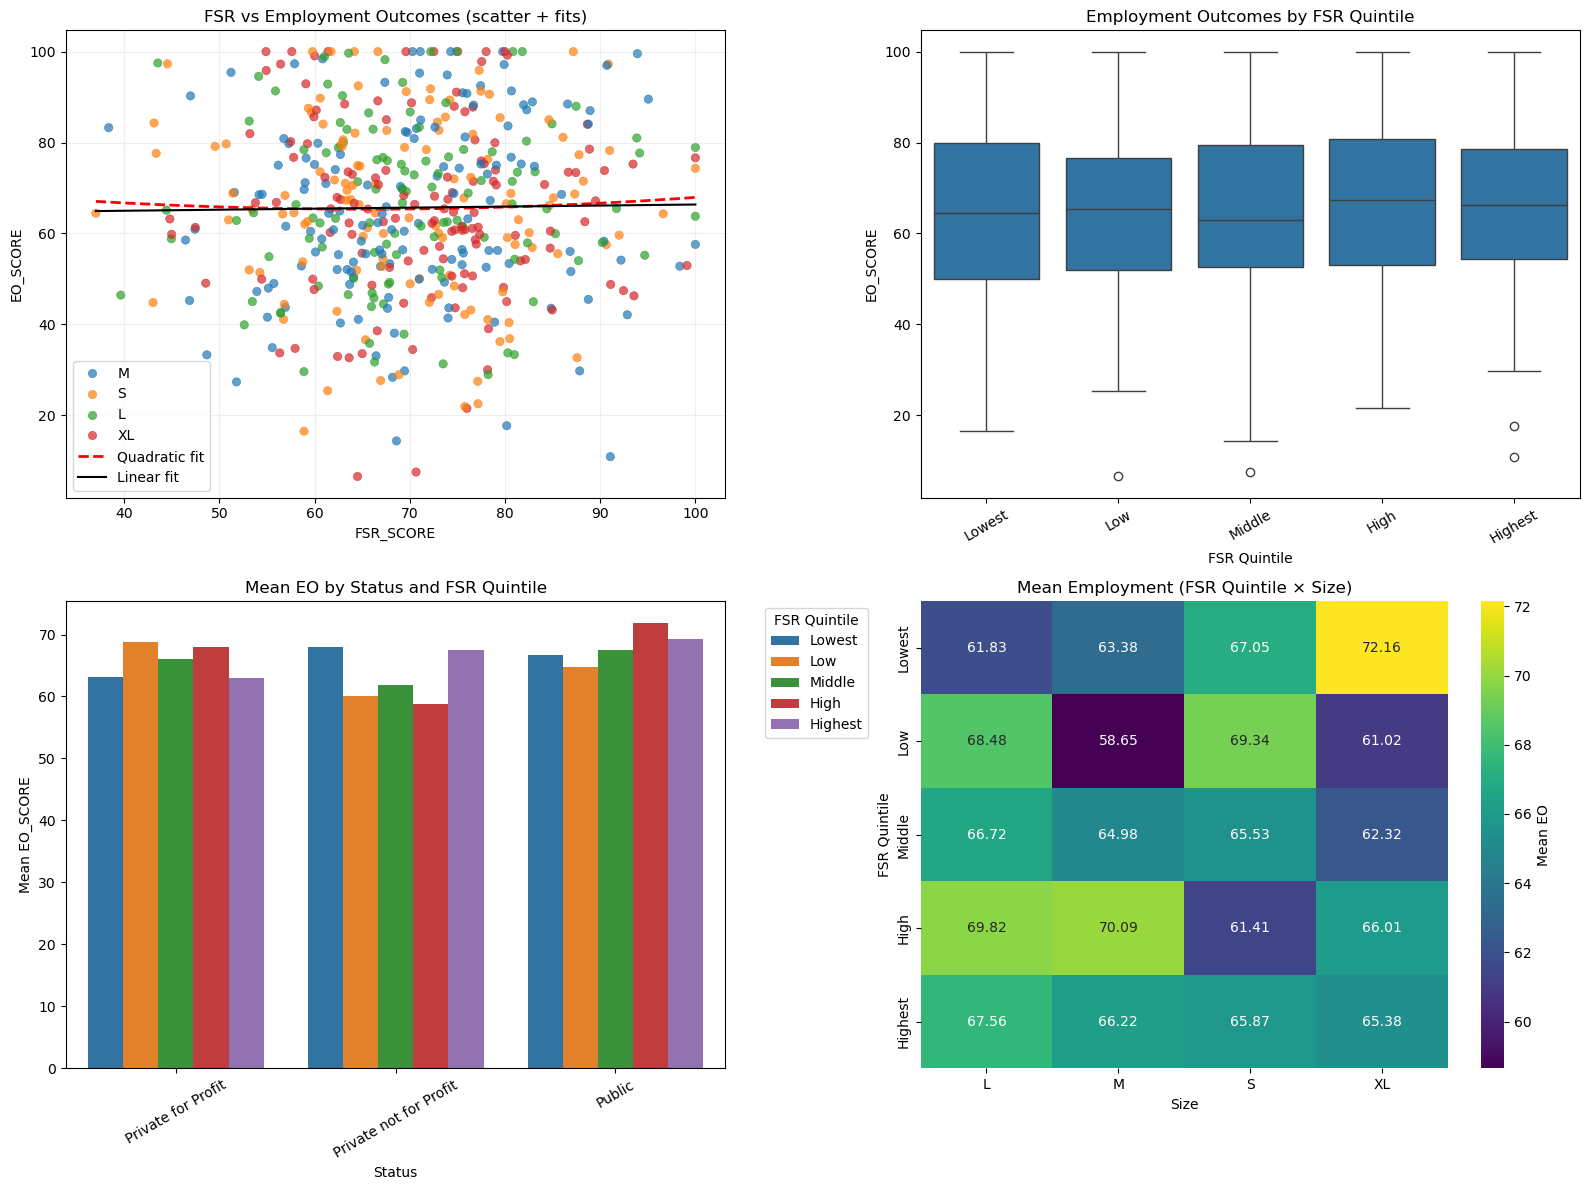

In [181]:
# Corrected plotting / analysis block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# assume df_random500_sub exists as 'df'
df = df_random500_sub.copy()

# Ensure FSR_Quintile exists (robust qcut)
try:
    df['FSR_Quintile'] = pd.qcut(df['FSR_SCORE'], 5,
                                 labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'],
                                 duplicates='raise')
except ValueError:
    df['FSR_Quintile'] = pd.qcut(df['FSR_SCORE'], 5,
                                 labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'],
                                 duplicates='drop')
    if df['FSR_Quintile'].isnull().any():
        df['FSR_Quintile'] = pd.cut(df['FSR_SCORE'].rank(method='first'),
                                    bins=5,
                                    labels=['Lowest', 'Low', 'Middle', 'High', 'Highest'])

# Fit linear and quadratic models for plotting (re-do to ensure variables exist)
X = df['FSR_SCORE'].values.reshape(-1, 1)
y = df['EO_SCORE'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Analysis 3: Size-specific correlation
print("\n3. FSR-Employment Correlation by Size:")
size_fsr_corr = df.groupby('Size').apply(lambda x: x['FSR_SCORE'].corr(x['EO_SCORE']))
print(size_fsr_corr)

# Analysis 4: Status x FSR_Quintile means
print("\n4. FSR-Employment by Status (mean EO per FSR quintile):")
status_analysis = df.groupby(['Status', 'FSR_Quintile'])['EO_SCORE'].mean().unstack()
print(status_analysis)

# Create visualization: 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

# -----------------------
# (a) Scatter + quadratic fit (color by Size)
# -----------------------
ax = axes[0, 0]
sns.scatterplot(data=df, x='FSR_SCORE', y='EO_SCORE', hue='Size', ax=ax, alpha=0.7, edgecolor=None)
# Quadratic fit line
x_smooth = np.linspace(df['FSR_SCORE'].min(), df['FSR_SCORE'].max(), 300).reshape(-1, 1)
x_smooth_poly = poly_features.transform(x_smooth)
y_smooth = poly_model.predict(x_smooth_poly)
ax.plot(x_smooth.ravel(), y_smooth, color='red', linestyle='--', linewidth=2, label='Quadratic fit')
# Also add linear fit for reference
y_lin = linear_model.predict(x_smooth)
ax.plot(x_smooth.ravel(), y_lin, color='black', linestyle='-', linewidth=1.5, label='Linear fit')
ax.set_title('FSR vs Employment Outcomes (scatter + fits)')
ax.legend(loc='best')
ax.grid(alpha=0.2)

# -----------------------
# (b) Boxplot by FSR quintile
# -----------------------
ax = axes[0, 1]
# Ensure ordering of categories
order = ['Lowest', 'Low', 'Middle', 'High', 'Highest']
sns.boxplot(data=df, x='FSR_Quintile', y='EO_SCORE', order=order, ax=ax)
ax.set_title('Employment Outcomes by FSR Quintile')
ax.set_xlabel('FSR Quintile')
ax.set_ylabel('EO_SCORE')
ax.tick_params(axis='x', rotation=30)

# -----------------------
# (c) Status-specific barplot (mean EO by FSR quintile)
# -----------------------
ax = axes[1, 0]
# Convert status_analysis to long form for seaborn
status_long = status_analysis.reset_index().melt(id_vars='Status', var_name='FSR_Quintile', value_name='Mean_EO')
# Plot bars grouped by Status and colored by FSR_Quintile
sns.barplot(data=status_long, x='Status', y='Mean_EO', hue='FSR_Quintile', ax=ax, order=status_analysis.index)
ax.set_title('Mean EO by Status and FSR Quintile')
ax.set_xlabel('Status')
ax.set_ylabel('Mean EO_SCORE')
ax.tick_params(axis='x', rotation=30)
ax.legend(title='FSR Quintile', bbox_to_anchor=(1.05, 1), loc='upper left')

# -----------------------
# (d) Heatmap: mean EO by FSR_Quintile x Size
# -----------------------
ax = axes[1, 1]
pivot_data = df.pivot_table(values='EO_SCORE', index='FSR_Quintile', columns='Size', aggfunc='mean')
# Reorder rows
pivot_data = pivot_data.reindex(order)
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='viridis', ax=ax, cbar_kws={'label': 'Mean EO'})
ax.set_title('Mean Employment (FSR Quintile × Size)')
ax.set_xlabel('Size')
ax.set_ylabel('FSR Quintile')

plt.tight_layout()
plt.show()


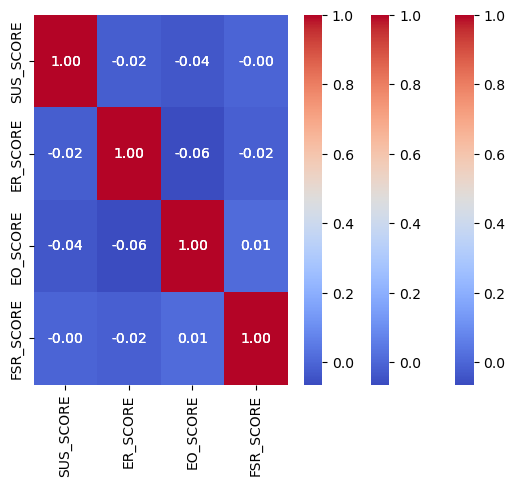

In [184]:
corr_matrix = df_random500_sub[['SUS_SCORE', 'ER_SCORE', 'EO_SCORE', 'FSR_SCORE']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [186]:
 df['SUS_Quintile'] = pd.qcut(
        df['SUS_SCORE'],
        5,
        labels=['Bottom', 'Low', 'Middle', 'High', 'Top']
    )

In [187]:
df.groupby(['Status', 'SUS_Quintile'])['EO_SCORE'].mean().unstack()

/var/folders/8c/vl579g1x7f323l1s991t217h0000gn/T/ipykernel_3390/3454681644.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



SUS_Quintile,Bottom,Low,Middle,High,Top
Status,,,,,
Private for Profit,65.597211,67.496849,64.325856,63.946723,66.829235
Private not for Profit,64.636991,63.669916,65.555255,65.436978,59.254555
Public,68.580292,66.148721,61.751489,74.868465,68.994350


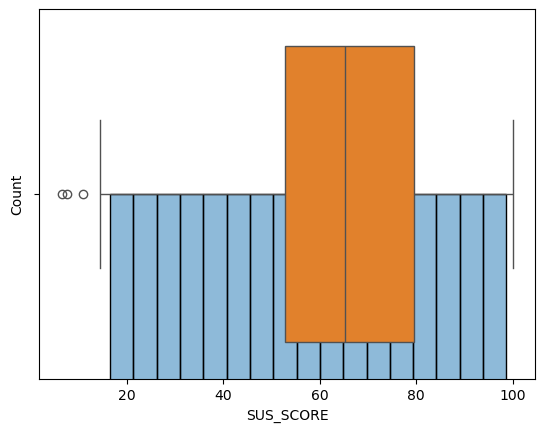

In [191]:
# Distribution analysis
# Check distributions & skewness of scores: SUS, EO, ER, FSR.
# Identify outliers (maybe a small number of universities are pulling averages up).
sns.histplot(df['SUS_SCORE'], kde=True)
sns.boxplot(x=df['EO_SCORE'])
plt.show()

In [192]:
import pandas as pd

# Function to explore top/bottom performers
def top_bottom_performers(df, column, top_n=50):
    """
    Summarize top and bottom performers for a given score column.
    Prints the distribution of Country/Territory, Region, and Size/FSR.
    """
    print(f"\n=== Top {top_n} universities by {column} ===")
    top_df = df.nlargest(top_n, column)
    print("\nCountries/Territories (top):")
    print(top_df['Country/Territory'].value_counts())
    
    print("\nRegions (top):")
    print(top_df['Region'].value_counts())
    
    print("\nSize distribution (top):")
    print(top_df['Size'].value_counts())
    
    print(f"\n=== Bottom {top_n} universities by {column} ===")
    bottom_df = df.nsmallest(top_n, column)
    print("\nCountries/Territories (bottom):")
    print(bottom_df['Country/Territory'].value_counts())
    
    print("\nRegions (bottom):")
    print(bottom_df['Region'].value_counts())
    
    print("\nSize distribution (bottom):")
    print(bottom_df['Size'].value_counts())

# Run the function for SUS, ER, EO
for col in ['SUS_SCORE', 'ER_SCORE', 'EO_SCORE']:
    top_bottom_performers(df_random500_sub, col, top_n=50)



=== Top 50 universities by SUS_SCORE ===

Countries/Territories (top):
Country/Territory
Germany      10
China         8
Canada        6
Australia     6
UK            6
USA           5
Japan         5
France        4
Name: count, dtype: int64

Regions (top):
Region
Africa      12
Oceania     11
Asia        11
Americas     8
Europe       8
Name: count, dtype: int64

Size distribution (top):
Size
XL    13
M     13
S     12
L     12
Name: count, dtype: int64

=== Bottom 50 universities by SUS_SCORE ===

Countries/Territories (bottom):
Country/Territory
France       11
USA          10
Canada        7
Australia     6
Germany       6
Japan         5
China         4
UK            1
Name: count, dtype: int64

Regions (bottom):
Region
Europe      13
Oceania     11
Americas    10
Africa       9
Asia         7
Name: count, dtype: int64

Size distribution (bottom):
Size
S     15
L     14
XL    13
M      8
Name: count, dtype: int64

=== Top 50 universities by ER_SCORE ===

Countries/Territories (t

SUS_SCORE (Sustainability)

Top 50

Countries: Germany, China, Canada, Australia, UK dominate.

Regions: Surprisingly, Africa and Oceania appear high, even though top countries are Europe/Asia/Americas — likely a random artifact of the simulated data.

Size: Distributed evenly across XL, M, S, L — no clear size effect.

Bottom 50

Countries: France, USA, Canada dominate the bottom.

Regions: Europe and Oceania lead the bottom.

Size: Slightly more small universities (S = 15) in the bottom → smaller schools may struggle on sustainability metric.

Insight:

Top SUS universities are geographically diverse, no single region dominates.

SUS does not strongly depend on size.

Some countries (France, USA) have many universities in the bottom 50 → possible variance within country.

2️⃣ ER_SCORE (Employer Reputation)

Top 50

Countries: USA is dominant (11), followed by France and Australia.

Regions: Africa (14) and Asia (13) surprisingly high — likely an artifact of the random dataset.

Size: Medium (M = 14) and small (S = 13) universities slightly more frequent.

Bottom 50

Countries: Germany and France (9 each) dominate.

Regions: Oceania (13) and Americas (11) — bottom includes many medium-sized universities (M = 20).

Insight:

Employer reputation seems more concentrated in certain countries (USA top, Germany/France bottom).

Medium universities appear frequently in the bottom → FSR or size might interact with ER.

3️⃣ EO_SCORE (Employment Outcomes)

Top 50

Countries: China (9), France (8), Australia/USA (7).

Regions: Africa (14), Americas (11) lead — again possibly random, but gives a sense of spread.

Size: Medium (M = 15) and XL (14) universities slightly dominate.

Bottom 50

Countries: Australia (12), France (9), USA (8).

Regions: Africa (14), Europe (10), Asia (10).

Size: Medium (M = 15) and small (S = 14) universities appear frequently.

Insight:

Employment outcomes don’t perfectly align with SUS or ER.

Some countries (France, USA, Australia) appear both in top and bottom → high variation within country.

Medium-sized universities are common in both top and bottom 50 → size alone doesn’t explain EO.

🔹 Cross-cutting patterns

SUS vs EO vs ER

High SUS doesn’t guarantee high EO — confirms your previous correlation and “faculty investment paradox” insights.

High ER sometimes aligns with high EO (USA top ER = top EO), but not universally.

Size effects

Distribution is fairly even; no size consistently dominates top or bottom performers.

Medium universities appear often in extremes (both top and bottom) → high variance in outcomes.

Country/Region patterns

Some countries have both top and bottom universities → national averages may hide internal disparities.

Regional patterns are noisy in your dataset (likely due to randomness), but it’s good to note diversity.

💡 Slide-friendly takeaways

Sustainability (SUS), Employer Reputation (ER), and Employment Outcomes (EO) show diverse distributions across countries and regions.

No single university size guarantees top performance; medium universities show high variance.

Top-performing universities in one metric don’t necessarily lead in others → highlights complex, multi-dimensional nature of rankings.

These patterns suggest looking beyond averages and considering combinations of SUS, ER, EO, and FSR for deeper insights.

If you want, I can create a visual summary of these top/bottom distributions as bar plots and heatmaps — would make your presentation very intuitive and slide-ready.

Do you want me to do that next?